In [3]:
from sklearn import datasets
wines = datasets.load_wine()

# Check the insides
print(wines.data)
print(wines.target)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
# Split the data into training and test sets
# By default train_test_split shuffles the data before splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wines.data, wines.target, test_size=0.3)

In [24]:
# Perform machine learning using svm
from sklearn import svm
clf = svm.SVC(gamma=0.0001)
clf.fit(X_train, y_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print("Train Accuracy: ", accuracy_train * 100, "%", sep='')
print("Test Accuracy: ", accuracy_test * 100, "%", sep='')

Train Accuracy: 73.38709677419355%
Test Accuracy: 72.22222222222221%


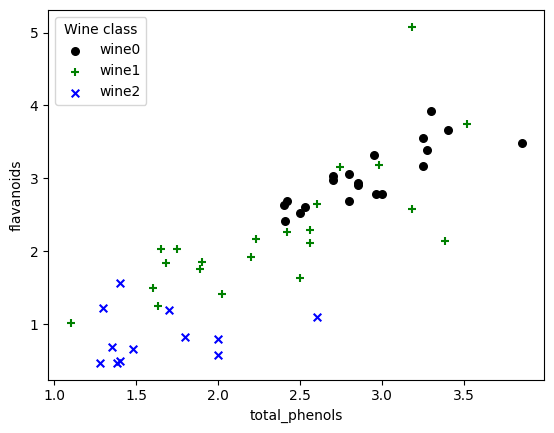

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x_idx, y_idx = 5, 6
x = X_test[:, x_idx]
y = X_test[:, y_idx]

fig, ax = plt.subplots()
classes = np.unique(y_test)
markers = ['o', '+', 'x']
colors = ['black', 'green', 'blue']
for cls in classes:
    mask = y_test == cls
    ax.scatter(x[mask], y[mask], s=30, marker=markers[int(cls)], color=colors[int(cls)], label=f"wine{cls}")

ax.set_xlabel(wines.feature_names[x_idx])
ax.set_ylabel(wines.feature_names[y_idx])
ax.legend(title="Wine class", loc="upper left")
plt.show()

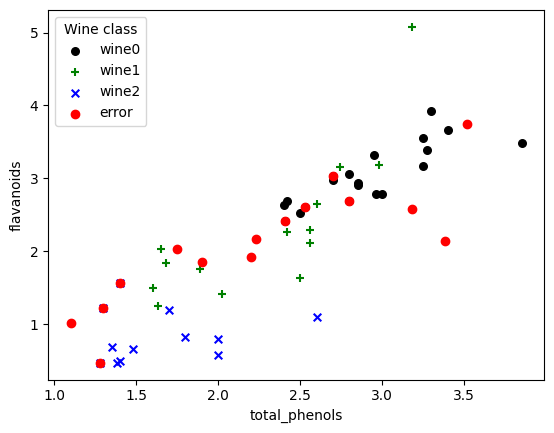

In [32]:
y_pred = clf.predict(X_test)
err_mask = y_test != y_pred

fig, ax = plt.subplots()
classes = np.unique(y_test)
markers = ['o', '+', 'x']
colors = ['black', 'green', 'blue']

for cls in classes:
    mask = y_test == cls
    ax.scatter(x[mask], y[mask], s=30, marker=markers[int(cls)], color=colors[int(cls)], label=f"wine{cls}")

ax.scatter(x[err_mask], y[err_mask], color='red', label='error')
ax.set_xlabel(wines.feature_names[x_idx])
ax.set_ylabel(wines.feature_names[y_idx])
ax.legend(title="Wine class", loc="upper left")
plt.show()

In [30]:
to_predict = np.array([
    [13.6, 1.7, 2.5, 20.5, 116.0, 3.0, 2.9, 0.2, 2.5, 6.3, 1.0, 3.0, 1120], 
    [13.1, 5.8, 2.1, 21.5,  86.0, 2.6, 2.7, 0.3, 2.0, 2.6, 0.7, 3.1,  380], 
    [13.7, 2.7, 2.4, 20.0,  89.0, 1.4, 0.5, 0.4, 0.6, 5.6, 0.7, 2.5,  780]
])

result = clf.predict(to_predict)
for i, pred in enumerate(result):
    print(f"Sample {i}: Predicted wine class is {pred}")

Sample 0: Predicted wine class is 0
Sample 1: Predicted wine class is 1
Sample 2: Predicted wine class is 2
